10
9 9 9
9 9 9 9
Images and masks are created
22 22
tensor(0.5930, grad_fn=<RsubBackward1>)
[0.6823253035545349, 0.580866813659668, 0.5288362503051758]


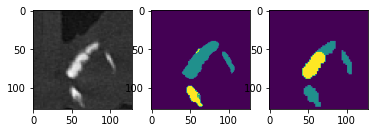

tensor(0.5438, grad_fn=<RsubBackward1>)
[0.7580251097679138, 0.6307764649391174, 0.5449658632278442]


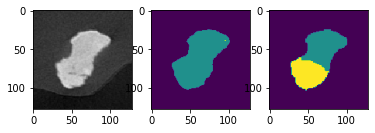

tensor(0.5711, grad_fn=<RsubBackward1>)
[0.6679229140281677, 0.593571662902832, 0.5397619009017944]


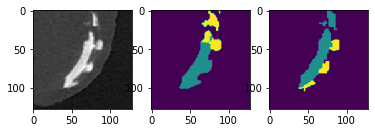

tensor(0.5109, grad_fn=<RsubBackward1>)
[0.7475377917289734, 0.7029868960380554, 0.5135409832000732]


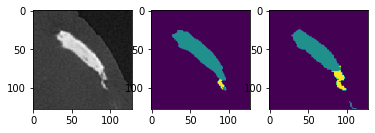

tensor(0.5584, grad_fn=<RsubBackward1>)
[0.7179746031761169, 0.4978582262992859, 0.6695201396942139]


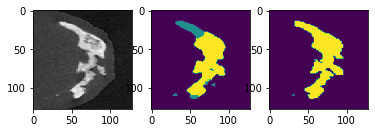

tensor(0.4157, grad_fn=<RsubBackward1>)
[0.8738498687744141, 0.8434045314788818, 0.4876778721809387]


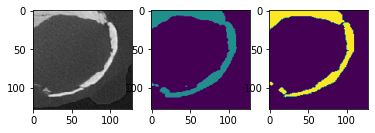

tensor(0.4683, grad_fn=<RsubBackward1>)
[0.8181973695755005, 0.752477765083313, 0.45593345165252686]


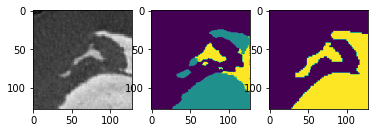

tensor(0.4563, grad_fn=<RsubBackward1>)
[0.8683084845542908, 0.7823335528373718, 0.465873122215271]


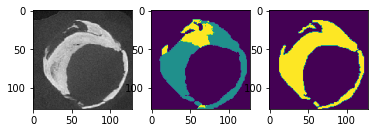

tensor(0.6077, grad_fn=<RsubBackward1>)
[0.5892602801322937, 0.5068548917770386, 0.5717431902885437]


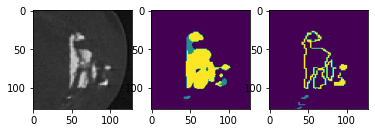

tensor(0.6166, grad_fn=<RsubBackward1>)
[0.5841550827026367, 0.5048511028289795, 0.5661571025848389]


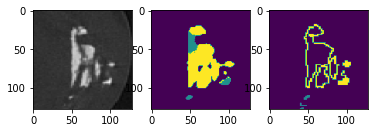

tensor(0.5418, grad_fn=<RsubBackward1>)
[0.702842652797699, 0.6776599287986755, 0.4913407564163208]


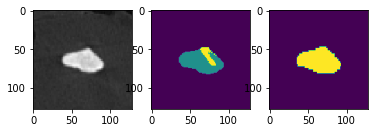

tensor(0.4972, grad_fn=<RsubBackward1>)
[0.7675078511238098, 0.6145299673080444, 0.6200635433197021]


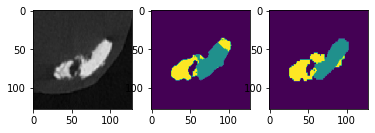

tensor(0.5603, grad_fn=<RsubBackward1>)
[0.7440613508224487, 0.4888840913772583, 0.6675381660461426]


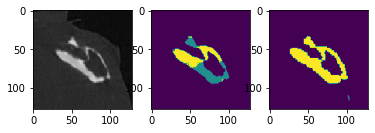

tensor(0.6333, grad_fn=<RsubBackward1>)
[0.8106751441955566, 0.46524322032928467, 0.624594509601593]


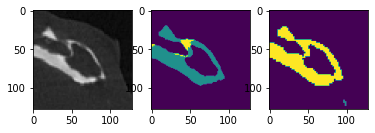

tensor(0.5005, grad_fn=<RsubBackward1>)
[0.8087950944900513, 0.48507821559906006, 0.7454464435577393]


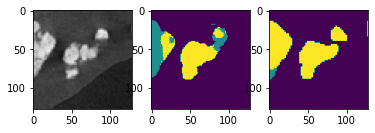

tensor(0.6417, grad_fn=<RsubBackward1>)
[0.671258270740509, 0.48347383737564087, 0.5777929425239563]


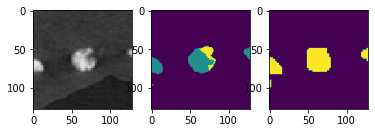

tensor(0.4236, grad_fn=<RsubBackward1>)
[0.9328733086585999, 0.7169574499130249, 0.5859770774841309]


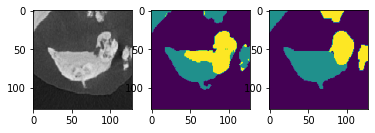

tensor(0.4349, grad_fn=<RsubBackward1>)
[0.8731330633163452, 0.5823644399642944, 0.7365939021110535]


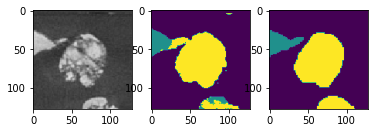

tensor(0.4585, grad_fn=<RsubBackward1>)
[0.8078526854515076, 0.49840307235717773, 0.8055858612060547]


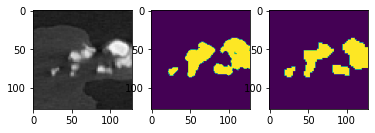

tensor(0.4408, grad_fn=<RsubBackward1>)
[0.8791936635971069, 0.7352262139320374, 0.5564125776290894]


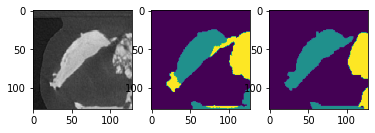

tensor(0.4636, grad_fn=<RsubBackward1>)
[0.7976575493812561, 0.4986134171485901, 0.7996236681938171]


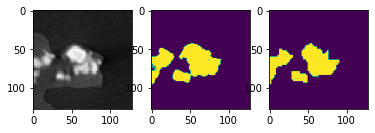

tensor(0.4976, grad_fn=<RsubBackward1>)
[0.8095966577529907, 0.6286654472351074, 0.5713449120521545]


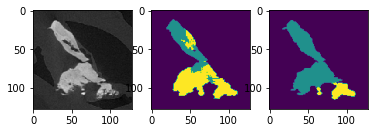

[0.76877291 0.60323096 0.5966511 ] 0.519806219772859


In [11]:
#######################################
# UNET Model 1
loss_fn  =  DiceLoss()  
dice_score_classes, loss = test(net, loss_fn, dataloaders_test, device, ProbaUnet = False, plot_ = True)
print(dice_score_classes, loss)


## MODEL UNET 1 DATA AUG

In [5]:
from outils_prepro import create_dir_paths, create_box_images

error = 20
Area = 100
path = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg\ora_180919\Layers'

image_Paths, mask_Paths = create_dir_paths(path, False)
image_list , mask_list =  create_box_images(image_Paths, mask_Paths, error, Area)
print('Images and masks are created')
print(len(image_list), len(mask_list))     

# TEST SUPER RESOLUTION
# from pickle import FALSE
# from outils_prepro import read_image, create_mask_SR
# import os, cv2
# import matplotlib.pyplot as plt
# import numpy as np
# path_sr_images = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\DATA_SFA001\mct_Prox\data_pro'
# os.listdir(path_sr_images)
# names_images =  [ f for f in os.listdir(path_sr_images) if f.endswith('CTsr2.png') ]
# names_masks =  [ f for f in os.listdir(path_sr_images) if f.endswith('seg.png') ]
# mCT_list = [ cv2.normalize(cv2.imread(os.path.join(path_sr_images, f)).astype(np.uint8),  None, 0, 255, cv2.NORM_MINMAX)  for f in os.listdir(path_sr_images) if f.endswith('mCT.png') ]
# image_list = [ read_image(os.path.join(path_sr_images, f), mask=False) for f in os.listdir(path_sr_images) if f.endswith('CTsr2.png') ]
# mask_list= [ create_mask_SR(cv2.imread(os.path.join(path_sr_images, f))) for f in os.listdir(path_sr_images) if f.endswith('seg.png') ]

# plt.imshow(mask_list[4])
# plt.show()
# plt.imshow(image_list[4])
# plt.show()
# plt.imshow(mCT_list[4])

10
9 9 9
9 9 9 9
Images and masks are created
22 22


In [1]:
#------------------------------------------------------------------
# TEST SUPER RESOLUTION IMAGES
#------------------------------------------------------------------
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#---------------------
from test import test 
from unet_4block_conv import *
from unet_3block_conv import *
from outils_prepro import * 
from data_loader_seg import *
from model_prob_unet_init import *
from create_images_3_classes import *
from training import *
from loss import *
#---------------------
# Data
batch_size_test  = 1
image_shape = (64, 64) 
#---------------------- 
data_test = SegmentationDataset(image_list, mask_list, image_shape)
dataloaders_test = torch.utils.data.DataLoader(data_test, batch_size_test)
#----------------------
# Model 
input_channels = 3
num_classes = 3
# learning_rate = 5e-4  
# epochs = 101
loss_fn  =  DiceLoss() 
folder_name = 'model_unet_1_data_aug'
#----------------------
# TEST
epoch_init = '40.torch'
#----------------------
beta = 20
filters = 8
z_dim = 10
#----------------------
if filters == 8:
    featureDim = 16384
if filters ==4:
    featureDim = 8192


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelPath = os.path.join(r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg', folder_name)
#net = Probabilistic_UNET(input_channels, num_classes, filters, z_dim, image_shape, featureDim)
net = UNET(input_channels, num_classes) 
net.to(device)
net.load_state_dict(torch.load(os.path.join(modelPath , epoch_init))) # Load trained model
net.eval()
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=0)

NameError: name 'image_list' is not defined

In [4]:
#----------------------
# Model 
input_channels = 3
num_classes = 3
net = UNET(input_channels, num_classes) 
summary(net, (3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]           4,736
       BatchNorm2d-2           [-1, 32, 64, 64]              64
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 32, 64, 64]          50,208
       BatchNorm2d-5           [-1, 32, 64, 64]              64
              ReLU-6           [-1, 32, 64, 64]               0
         MaxPool2d-7           [-1, 32, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          18,496
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,928
      BatchNorm2d-12           [-1, 64, 32, 32]             128
             ReLU-13           [-1, 64, 32, 32]               0
        MaxPool2d-14           [-1, 64,

tensor(0.5621, grad_fn=<RsubBackward1>)
[0.6817405819892883, 0.6022131443023682, 0.5458285212516785]


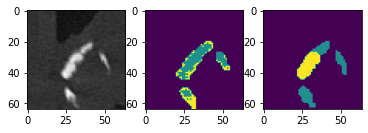

tensor(0.5491, grad_fn=<RsubBackward1>)
[0.7451763153076172, 0.6043149828910828, 0.565481424331665]


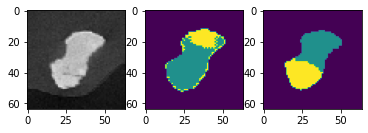

tensor(0.5658, grad_fn=<RsubBackward1>)
[0.6528447270393372, 0.6007630228996277, 0.5219374895095825]


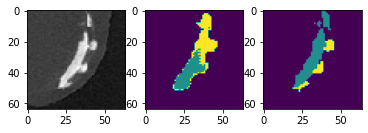

tensor(0.5320, grad_fn=<RsubBackward1>)
[0.7184523344039917, 0.6825976967811584, 0.49934089183807373]


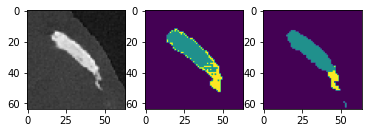

tensor(0.5890, grad_fn=<RsubBackward1>)
[0.6646633744239807, 0.4695820212364197, 0.6086745262145996]


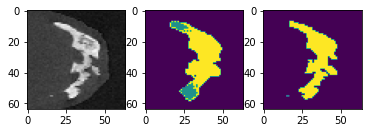

tensor(0.4734, grad_fn=<RsubBackward1>)
[0.8008526563644409, 0.8100440502166748, 0.456356942653656]


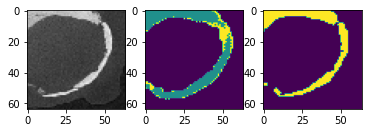

tensor(0.5148, grad_fn=<RsubBackward1>)
[0.7907694578170776, 0.717424750328064, 0.4182751178741455]


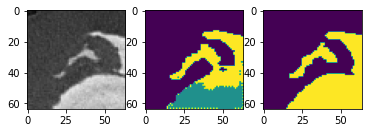

tensor(0.5061, grad_fn=<RsubBackward1>)
[0.8025407791137695, 0.7625576257705688, 0.4315340518951416]


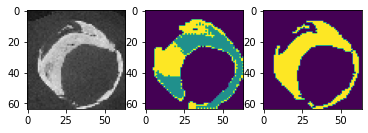

tensor(0.6367, grad_fn=<RsubBackward1>)
[0.5590023994445801, 0.4757671356201172, 0.5466916561126709]


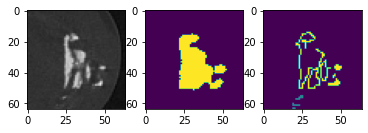

tensor(0.6364, grad_fn=<RsubBackward1>)
[0.560434103012085, 0.47299736738204956, 0.548187255859375]


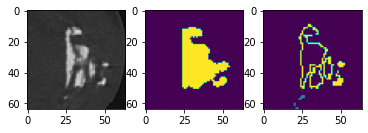

tensor(0.5443, grad_fn=<RsubBackward1>)
[0.7050021886825562, 0.6899415850639343, 0.4778944253921509]


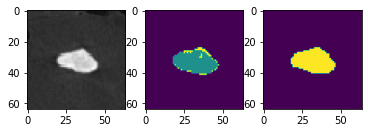

tensor(0.5307, grad_fn=<RsubBackward1>)
[0.760162889957428, 0.6283928155899048, 0.5810797214508057]


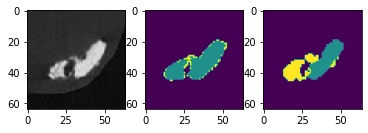

tensor(0.5778, grad_fn=<RsubBackward1>)
[0.7144583463668823, 0.47825783491134644, 0.6581881642341614]


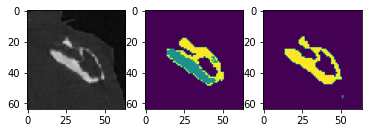

tensor(0.5350, grad_fn=<RsubBackward1>)
[0.7914498448371887, 0.46908581256866455, 0.7110691070556641]


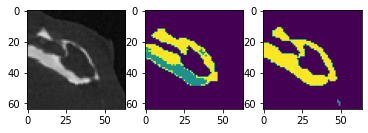

tensor(0.5182, grad_fn=<RsubBackward1>)
[0.7678767442703247, 0.4762267470359802, 0.6829782724380493]


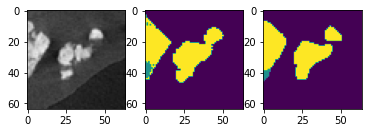

tensor(0.5944, grad_fn=<RsubBackward1>)
[0.6712724566459656, 0.48518598079681396, 0.6124502420425415]


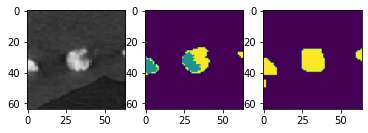

tensor(0.4758, grad_fn=<RsubBackward1>)
[0.8493300676345825, 0.6824310421943665, 0.5464577078819275]


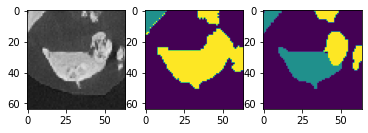

tensor(0.5023, grad_fn=<RsubBackward1>)
[0.8075702786445618, 0.5408151745796204, 0.619125247001648]


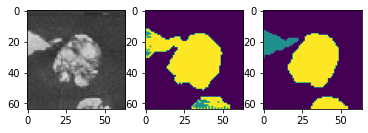

tensor(0.5293, grad_fn=<RsubBackward1>)
[0.7688600420951843, 0.4773486852645874, 0.6903037428855896]


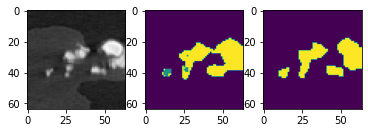

tensor(0.4844, grad_fn=<RsubBackward1>)
[0.8221097588539124, 0.7193907499313354, 0.500619113445282]


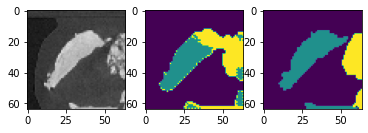

tensor(0.5298, grad_fn=<RsubBackward1>)
[0.7540163993835449, 0.4759495258331299, 0.6840903759002686]


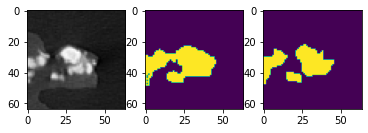

tensor(0.5452, grad_fn=<RsubBackward1>)
[0.7464743852615356, 0.6180980801582336, 0.5210455656051636]


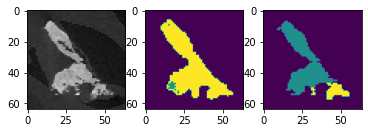

[0.73341182 0.5881539  0.56489134] 0.5423920750617981


In [9]:
#######################################
# UNET Model 1 DATA AUG
loss_fn  =  DiceLoss()  
dice_score_classes, loss = test(net, loss_fn, dataloaders_test, device, ProbaUnet = False, plot_ = True)
print(dice_score_classes, loss)

## MODE UNET 2

tensor(0.5733, grad_fn=<RsubBackward1>)
[0.680544376373291, 0.62265944480896, 0.4918351173400879]


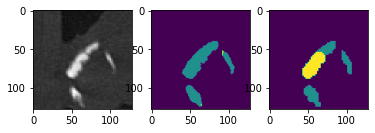

tensor(0.5079, grad_fn=<RsubBackward1>)
[0.7573679089546204, 0.6499879956245422, 0.5365496277809143]


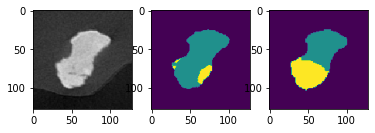

tensor(0.5179, grad_fn=<RsubBackward1>)
[0.6718255281448364, 0.6379474997520447, 0.5643659234046936]


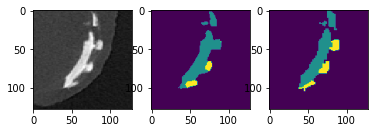

tensor(0.5189, grad_fn=<RsubBackward1>)
[0.7365983128547668, 0.7127638459205627, 0.4983179569244385]


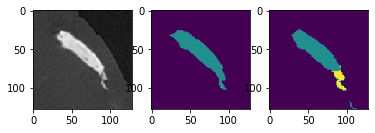

tensor(0.5941, grad_fn=<RsubBackward1>)
[0.7106897830963135, 0.48118817806243896, 0.5794433951377869]


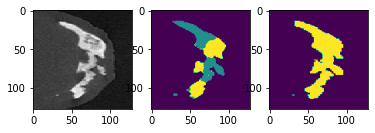

tensor(0.4283, grad_fn=<RsubBackward1>)
[0.8740519285202026, 0.8443491458892822, 0.49216288328170776]


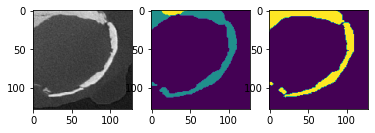

tensor(0.4961, grad_fn=<RsubBackward1>)
[0.8143556714057922, 0.7160951495170593, 0.4598069190979004]


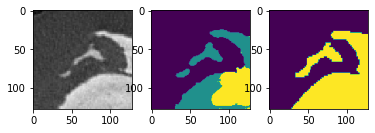

tensor(0.4094, grad_fn=<RsubBackward1>)
[0.877296507358551, 0.8743981719017029, 0.49411243200302124]


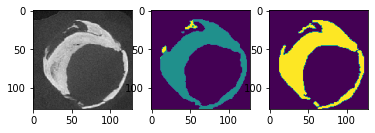

tensor(0.6626, grad_fn=<RsubBackward1>)
[0.5753347277641296, 0.47414934635162354, 0.5224067568778992]


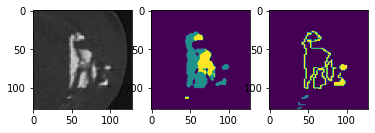

tensor(0.6525, grad_fn=<RsubBackward1>)
[0.5733655691146851, 0.4706650972366333, 0.5367864370346069]


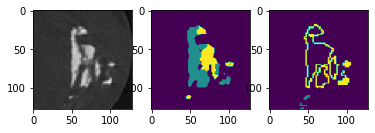

tensor(0.5267, grad_fn=<RsubBackward1>)
[0.703269362449646, 0.704759418964386, 0.49586665630340576]


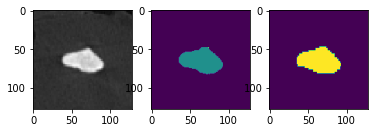

tensor(0.4814, grad_fn=<RsubBackward1>)
[0.7644803524017334, 0.6364893317222595, 0.616234302520752]


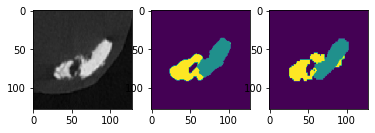

tensor(0.6173, grad_fn=<RsubBackward1>)
[0.7435365915298462, 0.4800913333892822, 0.5523465871810913]


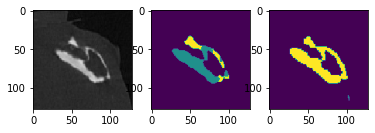

tensor(0.6326, grad_fn=<RsubBackward1>)
[0.8048286437988281, 0.4665359854698181, 0.5289589166641235]


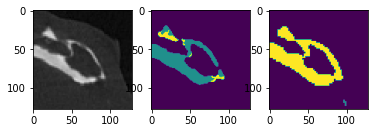

tensor(0.5702, grad_fn=<RsubBackward1>)
[0.7958849668502808, 0.4713171720504761, 0.614642858505249]


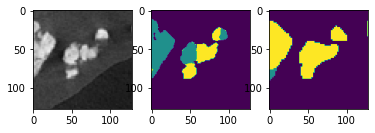

tensor(0.6162, grad_fn=<RsubBackward1>)
[0.6645495295524597, 0.486539363861084, 0.5619455575942993]


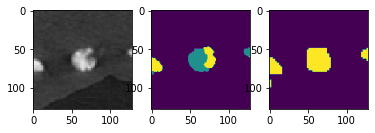

tensor(0.4065, grad_fn=<RsubBackward1>)
[0.9294748902320862, 0.7416250109672546, 0.5793029069900513]


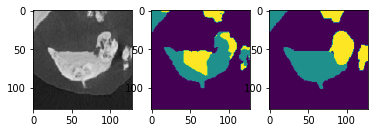

tensor(0.4322, grad_fn=<RsubBackward1>)
[0.8586071729660034, 0.6342778205871582, 0.6790202856063843]


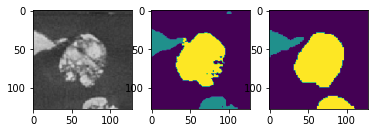

tensor(0.5181, grad_fn=<RsubBackward1>)
[0.8089665174484253, 0.48867595195770264, 0.7022470831871033]


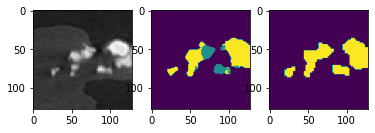

tensor(0.3761, grad_fn=<RsubBackward1>)
[0.8814636468887329, 0.8286511898040771, 0.5701992511749268]


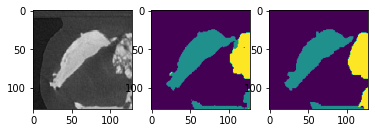

tensor(0.5117, grad_fn=<RsubBackward1>)
[0.7947686910629272, 0.4875859022140503, 0.707097053527832]


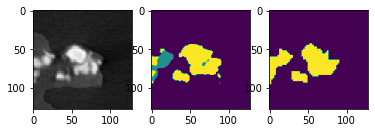

tensor(0.4993, grad_fn=<RsubBackward1>)
[0.8063284754753113, 0.6921098232269287, 0.5100314617156982]


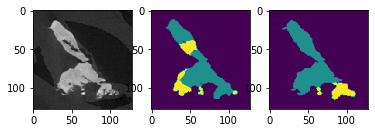

[0.76489042 0.61831192 0.55880365] 0.5249719646843997


In [10]:
#######################################
# UNET Model 2
loss_fn  =  DiceLoss()  
dice_score_classes, loss = test(net, loss_fn, dataloaders_test, device, ProbaUnet = False, plot_ = True)
print(dice_score_classes, loss)

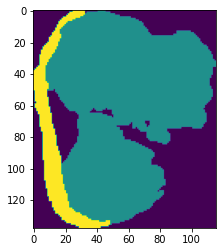

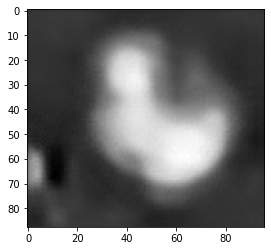

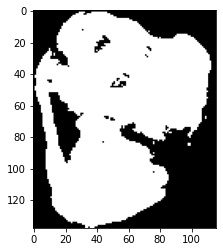

In [107]:
from pickle import FALSE
from outils_prepro import read_image#, create_mask_SR
import os, cv2
import matplotlib.pyplot as plt
import numpy as np
path_sr_images = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\DATA_SFA001\mct_Prox\data_pro'
os.listdir(path_sr_images)
names_images =  [ f for f in os.listdir(path_sr_images) if f.endswith('CTsr2.png') ]
names_masks =  [ f for f in os.listdir(path_sr_images) if f.endswith('seg.png') ]
mCT_list = [ cv2.normalize(cv2.imread(os.path.join(path_sr_images, f)).astype(np.uint8),  None, 0, 255, cv2.NORM_MINMAX)  for f in os.listdir(path_sr_images) if f.endswith('mCT.png') ]
image_list = [ read_image(os.path.join(path_sr_images, f), mask=False) for f in os.listdir(path_sr_images) if f.endswith('CTsr2.png') ]
mask_list= [ create_mask_SR(cv2.imread(os.path.join(path_sr_images, f))) for f in os.listdir(path_sr_images) if f.endswith('seg.png') ]

plt.imshow(mask_list[4])
plt.show()
plt.imshow(image_list[4])
plt.show()
plt.imshow(mCT_list[4])

In [114]:

#------------------------------------------------------------------
# TEST SUPER RESOLUTION IMAGES
#------------------------------------------------------------------
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#---------------------
from test import test 
from unet_4block_conv import *
from unet_3block_conv import *
from outils_prepro import * 
from data_loader_seg import *
from model_prob_unet_init import *
from create_images_3_classes import *
from training import *
from loss import *
#---------------------
# Data
batch_size_test  = 1
image_shape = (64, 64) 
#---------------------- 
data_test = SegmentationDataset(image_list, mask_list, image_shape)
dataloaders_test = torch.utils.data.DataLoader(data_test, batch_size_test)
#----------------------
# Model 
input_channels = 3
num_classes = 3
# learning_rate = 5e-4  
# epochs = 101
loss_fn  =  DiceLoss() 
folder_name = 'model1'
#----------------------
# TEST
epoch_init = '100.torch'
#----------------------
beta = 20
filters = 8
z_dim = 10
#----------------------
if filters == 8:
    featureDim = 16384
if filters ==4:
    featureDim = 8192


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelPath = os.path.join(r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg', folder_name)
net = Probabilistic_UNET(input_channels, num_classes, filters, z_dim, image_shape, featureDim)
#net = UNET(input_channels, num_classes) 
net.to(device)
net.load_state_dict(torch.load(os.path.join(modelPath , epoch_init))) # Load trained model
net.eval()
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=0)

Probabilistic_UNET(
  (priori): priori(
    (p_z): Sequential(
      (0): Conv2d(3, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
    (conv_layer): Conv2d(16, 20, kernel_size=(1, 1), stride=(1, 1))
  )
  (UNET): UNET(
    (conv1): Sequential(
      (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=

SFA001_A.2.1.1_CTsr2.png


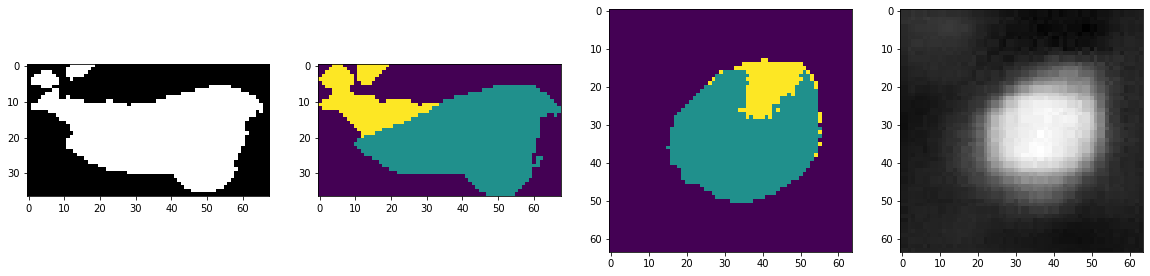

SFA001_A.2.1.2_CTsr2.png


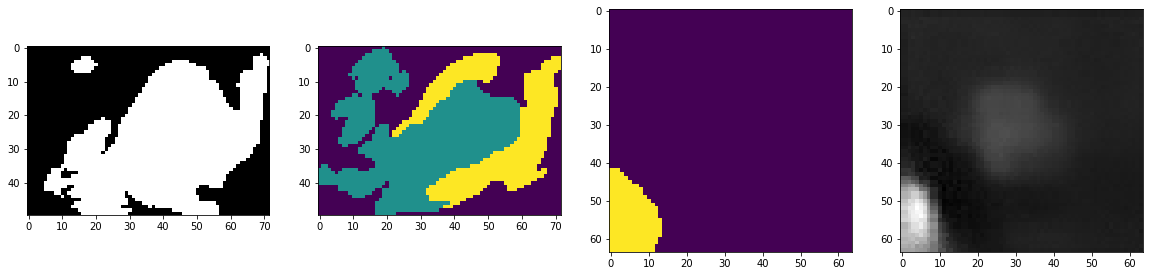

SFA001_A.2.1.3_CTsr2.png


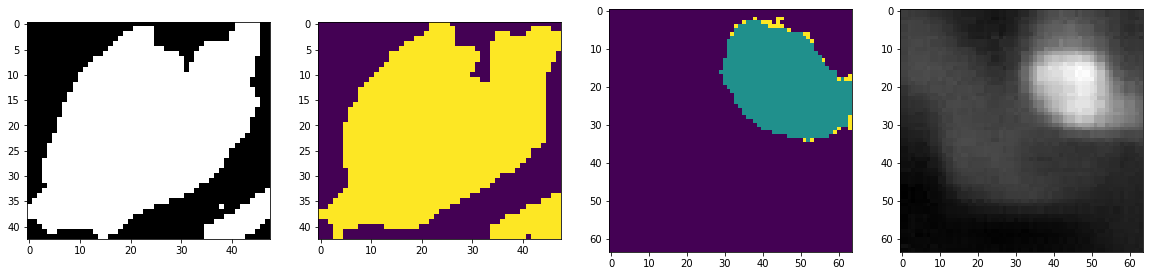

SFA001_A.3.1.1_CTsr2.png


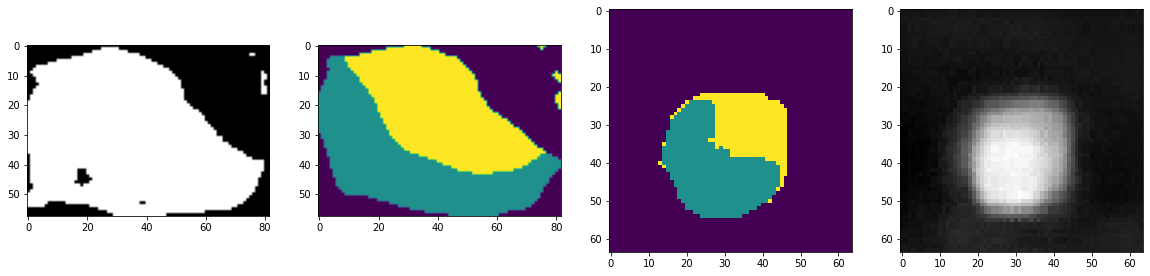

SFA001_A.3.1.3_CTsr2.png


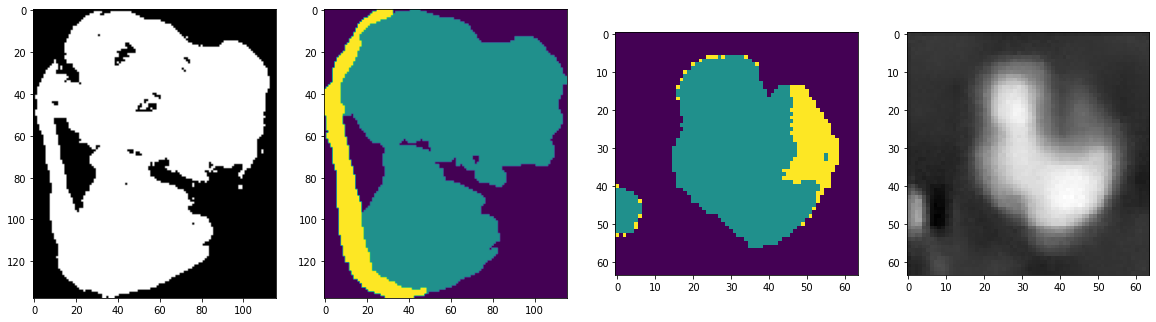

SFA001_A.3.1.5_CTsr2.png


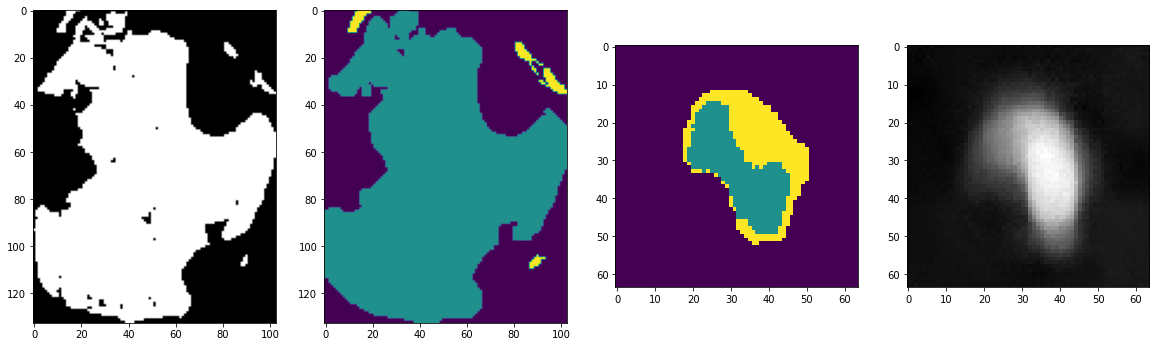

SFA001_A.4.1.1_CTsr2.png


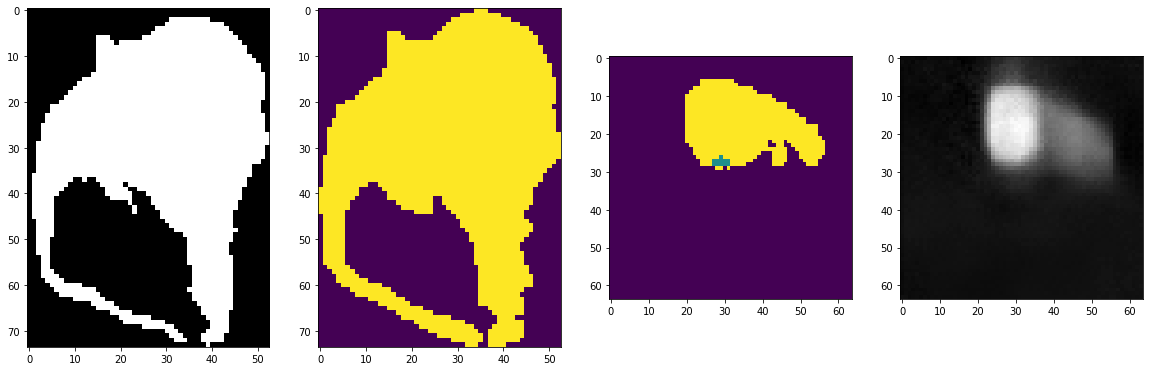

SFA001_A.4.1.4_CTsr2.png


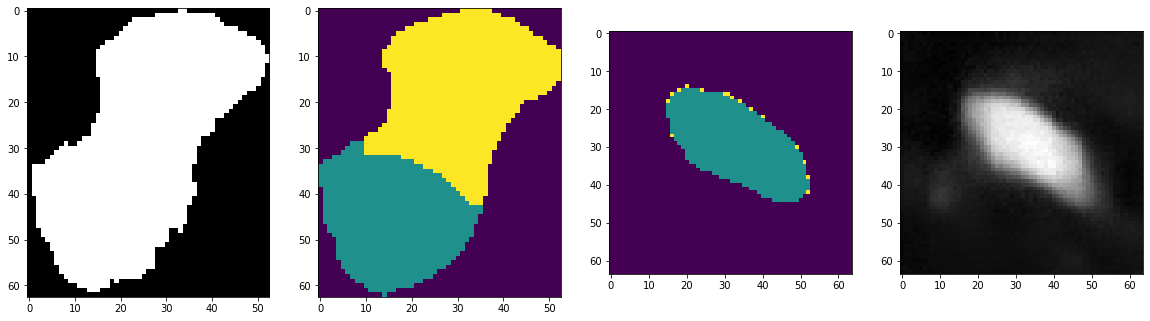

SFA001_A.4.1.5_CTsr2.png


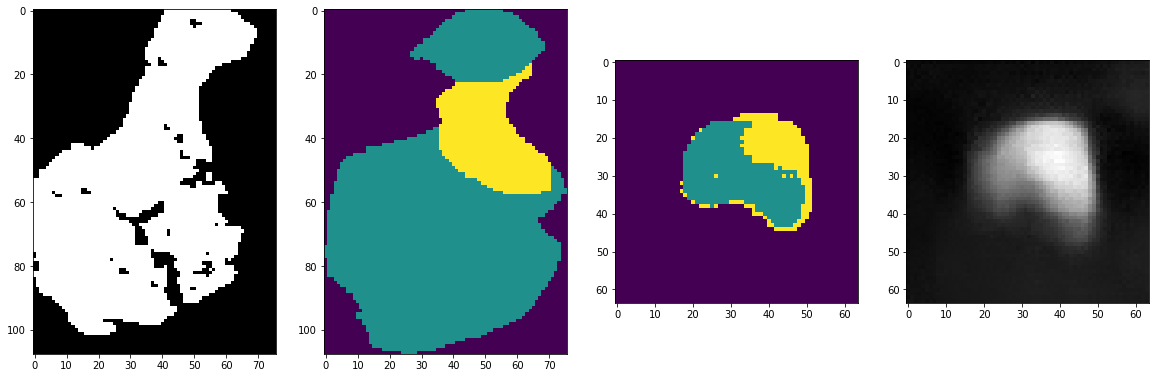

SFA001_A.4.1.6_CTsr2.png


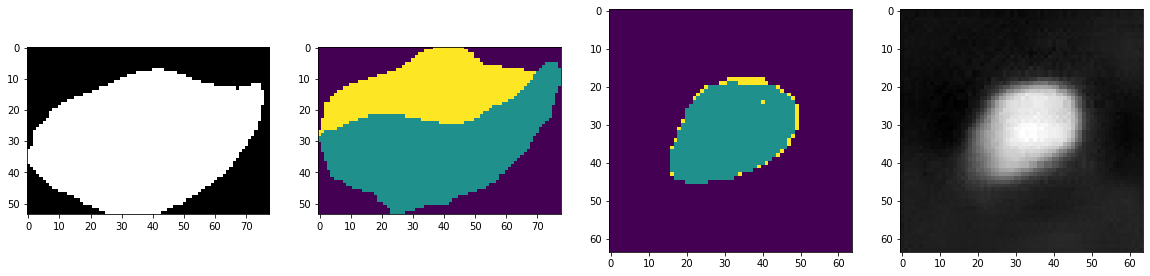

SFA001_A.5.1.1_CTsr2.png


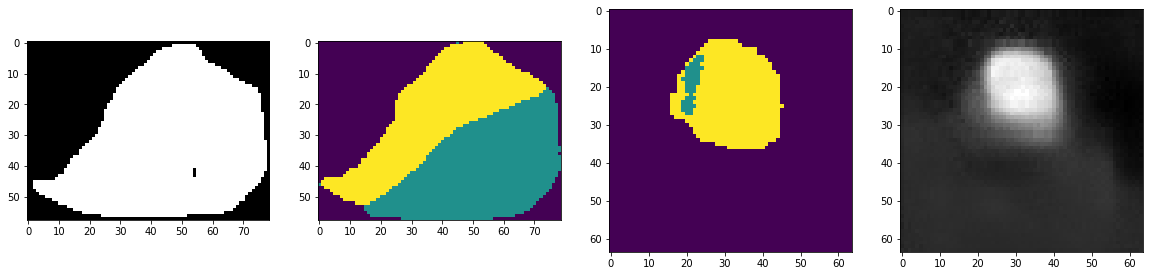

In [115]:
from matplotlib.pyplot import figure


def test_SR(net, loss_fn, dataloaders_test, device, mCT, seg_mCT,names,ProbaUnet = True, plot_ = True):
    for index, batch in enumerate(dataloaders_test): 
        X, y = batch

        X, y = X.to(device), y.to(device)
        
        if ProbaUnet:
            _,_, pred =  net(X, y)
        else:
            pred =  net(X)

        seg = torch.argmax(pred, dim=1).numpy()[0]# torch.argmax(pred, 1).numpy()  # Get  prediction classes
        for i in range(pred.shape[1]):
            y1 = 1*(y==i)
            pred1 = pred[:,i,:,:].unsqueeze(0)
        if plot_:
            print(names[index])
            _, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 10))
            ax1.imshow(mCT[index])
            ax2.imshow(seg_mCT[index])
            ax3.imshow(seg)
            ax4.imshow(X.squeeze().permute(1,2,0))
            
            plt.show()

test_SR(net, loss_fn, dataloaders_test, device,mCT_list, mask_list, names_images, ProbaUnet = True, plot_ = True)

10
9 9 9
9 9 9 9
Images and masks are created
22 22
tensor(0.5675, grad_fn=<RsubBackward1>)
[0.6021435856819153, 0.5818462371826172, 0.5644324421882629]


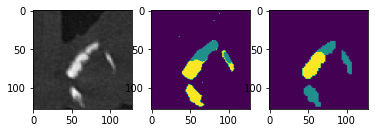

tensor(0.4309, grad_fn=<RsubBackward1>)
[0.5754578113555908, 0.6892833113670349, 0.5903612375259399]


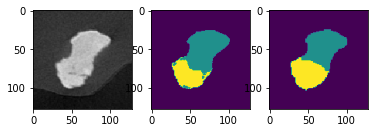

tensor(0.5379, grad_fn=<RsubBackward1>)
[0.5251165628433228, 0.6297849416732788, 0.5541828274726868]


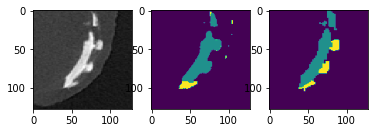

tensor(0.5216, grad_fn=<RsubBackward1>)
[0.4731864929199219, 0.716425895690918, 0.5070981383323669]


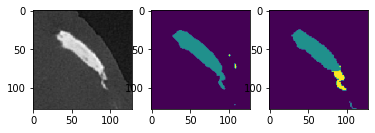

tensor(0.5975, grad_fn=<RsubBackward1>)
[0.5960665345191956, 0.4774601459503174, 0.7130208015441895]


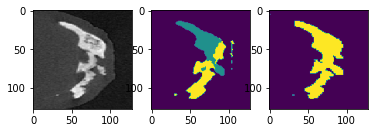

tensor(0.4030, grad_fn=<RsubBackward1>)
[0.460732102394104, 0.8919799327850342, 0.45820456743240356]


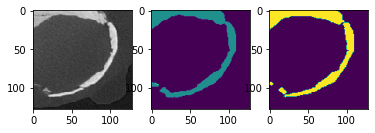

tensor(0.4632, grad_fn=<RsubBackward1>)
[0.4937598705291748, 0.8117377758026123, 0.3982619643211365]


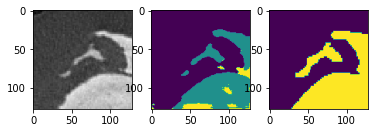

tensor(0.4295, grad_fn=<RsubBackward1>)
[0.5649286508560181, 0.8510598540306091, 0.4178584814071655]


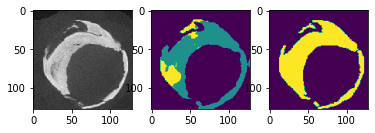

tensor(0.6293, grad_fn=<RsubBackward1>)
[0.5808718800544739, 0.4847182035446167, 0.5781923532485962]


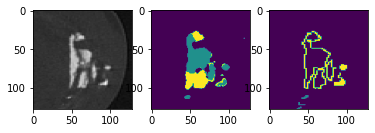

tensor(0.6212, grad_fn=<RsubBackward1>)
[0.5881628394126892, 0.4821644425392151, 0.5768317580223083]


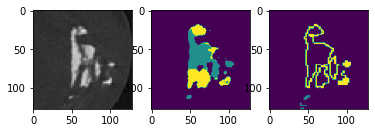

tensor(0.5269, grad_fn=<RsubBackward1>)
[0.4768829345703125, 0.710020899772644, 0.4775277376174927]


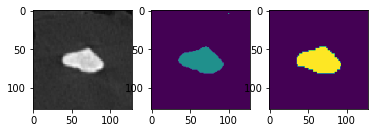

tensor(0.5420, grad_fn=<RsubBackward1>)
[0.656221866607666, 0.596764326095581, 0.6213831901550293]


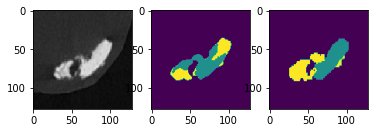

tensor(0.5492, grad_fn=<RsubBackward1>)
[0.685214102268219, 0.4910379648208618, 0.7419520616531372]


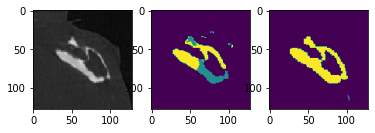

tensor(0.6073, grad_fn=<RsubBackward1>)
[0.6090929508209229, 0.47055184841156006, 0.8122122287750244]


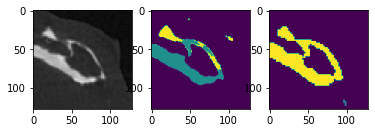

tensor(0.5261, grad_fn=<RsubBackward1>)
[0.7081866264343262, 0.47228002548217773, 0.8093998432159424]


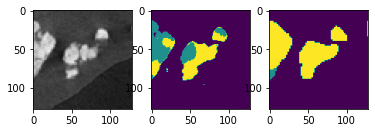

tensor(0.5608, grad_fn=<RsubBackward1>)
[0.660621702671051, 0.4990338683128357, 0.6768553256988525]


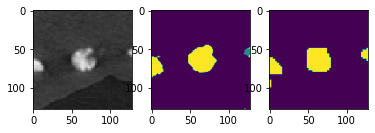

tensor(0.4185, grad_fn=<RsubBackward1>)
[0.7808348536491394, 0.7255162596702576, 0.5993589758872986]


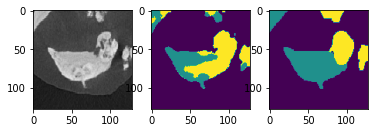

tensor(0.3981, grad_fn=<RsubBackward1>)
[0.7223824262619019, 0.6523083448410034, 0.7432277798652649]


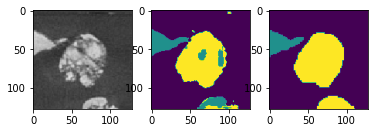

tensor(0.4715, grad_fn=<RsubBackward1>)
[0.8027642965316772, 0.49811601638793945, 0.8008918166160583]


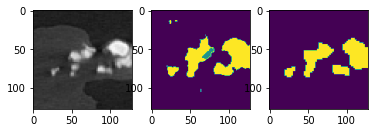

tensor(0.3828, grad_fn=<RsubBackward1>)
[0.5582533478736877, 0.8364055752754211, 0.5382801294326782]


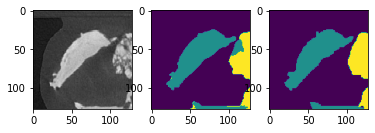

tensor(0.5130, grad_fn=<RsubBackward1>)
[0.7426034212112427, 0.4910764694213867, 0.7854275703430176]


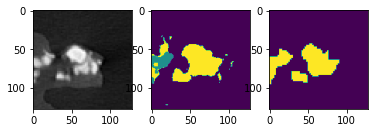

tensor(0.5213, grad_fn=<RsubBackward1>)
[0.7282202243804932, 0.6110859513282776, 0.5441404581069946]


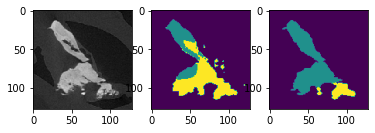

[0.61780478 0.62139356 0.61405008] 0.5099581669677388


In [14]:
#######################################
# Proba UNET Model 1
loss_fn  =  DiceLoss()  
dice_score_classes, loss = test(net, loss_fn, dataloaders_test, device, ProbaUnet = True, plot_ = True)
print(dice_score_classes, loss)


tensor(0.6504, grad_fn=<RsubBackward1>)
[0.418681263923645, 0.529209315776825, 0.49485987424850464]


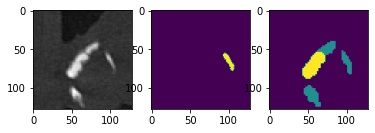

tensor(0.5679, grad_fn=<RsubBackward1>)
[0.47523462772369385, 0.6409813761711121, 0.5254227519035339]


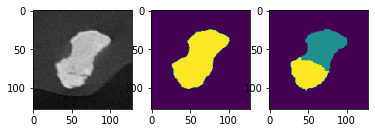

tensor(0.5769, grad_fn=<RsubBackward1>)
[0.4427673816680908, 0.6390810012817383, 0.47101813554763794]


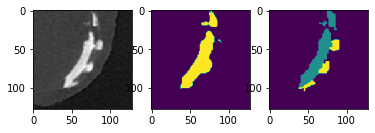

tensor(0.5405, grad_fn=<RsubBackward1>)
[0.44532668590545654, 0.710067868232727, 0.46608084440231323]


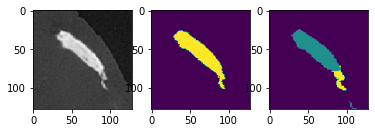

tensor(0.6708, grad_fn=<RsubBackward1>)
[0.42805469036102295, 0.49386441707611084, 0.5521106123924255]


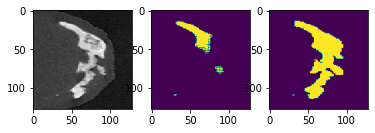

tensor(0.4880, grad_fn=<RsubBackward1>)
[0.5012238025665283, 0.7914999127388, 0.3984109163284302]


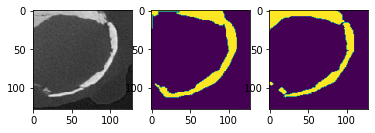

tensor(0.4693, grad_fn=<RsubBackward1>)
[0.5129337310791016, 0.822037935256958, 0.3597228527069092]


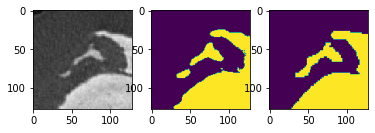

tensor(0.4163, grad_fn=<RsubBackward1>)
[0.5268043279647827, 0.8859443664550781, 0.4089006781578064]


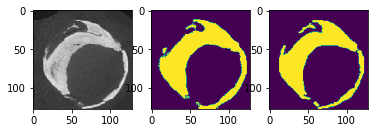

tensor(0.6720, grad_fn=<RsubBackward1>)
[0.41347336769104004, 0.4911927580833435, 0.5057854056358337]


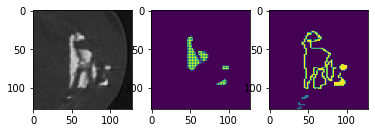

tensor(0.6747, grad_fn=<RsubBackward1>)
[0.41459572315216064, 0.48344892263412476, 0.5266837477684021]


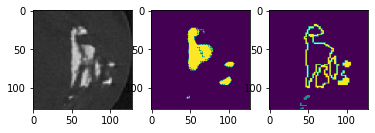

tensor(0.5354, grad_fn=<RsubBackward1>)
[0.446394681930542, 0.7097585201263428, 0.4588761329650879]


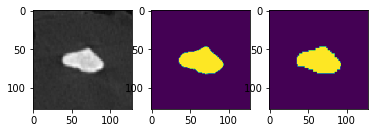

tensor(0.5975, grad_fn=<RsubBackward1>)
[0.4555264711380005, 0.6066651940345764, 0.4622696042060852]


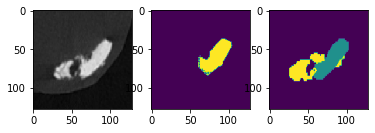

tensor(0.6614, grad_fn=<RsubBackward1>)
[0.4457811117172241, 0.48087745904922485, 0.6775591969490051]


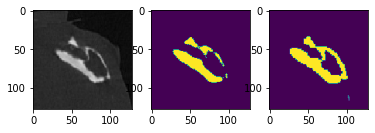

tensor(0.6718, grad_fn=<RsubBackward1>)
[0.4737362861633301, 0.463778555393219, 0.6434999704360962]


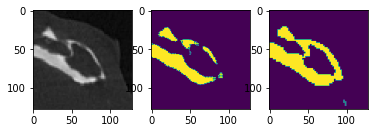

tensor(0.6601, grad_fn=<RsubBackward1>)
[0.4525630474090576, 0.4855390787124634, 0.582223653793335]


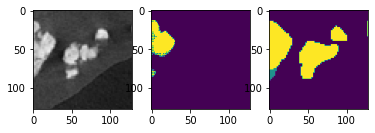

tensor(0.6691, grad_fn=<RsubBackward1>)
[0.42043638229370117, 0.49549174308776855, 0.5135689973831177]


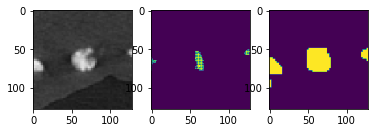

tensor(0.4487, grad_fn=<RsubBackward1>)
[0.5119958519935608, 0.8346559405326843, 0.46445703506469727]


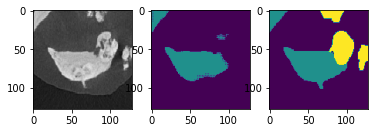

tensor(0.5913, grad_fn=<RsubBackward1>)
[0.48204290866851807, 0.6129440069198608, 0.5619903206825256]


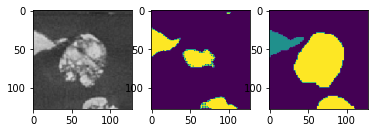

tensor(0.6649, grad_fn=<RsubBackward1>)
[0.4420121908187866, 0.48395562171936035, 0.5274174213409424]


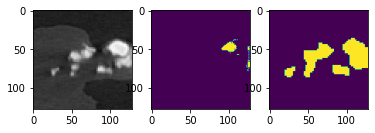

tensor(0.4785, grad_fn=<RsubBackward1>)
[0.49199652671813965, 0.7995339632034302, 0.43047475814819336]


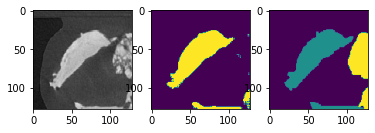

tensor(0.6658, grad_fn=<RsubBackward1>)
[0.441758394241333, 0.485901415348053, 0.5218604803085327]


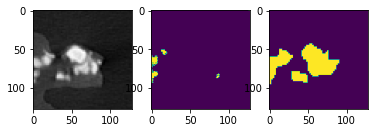

tensor(0.5658, grad_fn=<RsubBackward1>)
[0.4557955861091614, 0.6486209034919739, 0.49124598503112793]


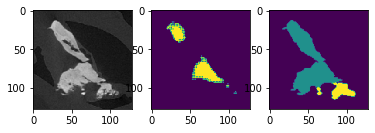

[0.45905159 0.61795683 0.50201997] 0.5880498560992155


In [8]:
#######################################
# Proba UNET Model 4

loss_fn  =  DiceLoss()  
dice_score_classes, loss = test(net, loss_fn, dataloaders_test, device, ProbaUnet = True, plot_ = True)
print(dice_score_classes, loss)


tensor(0.5686, grad_fn=<RsubBackward1>)
[0.6533581018447876, 0.6003612279891968, 0.47069305181503296]


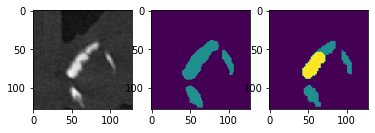

tensor(0.5387, grad_fn=<RsubBackward1>)
[0.7040566205978394, 0.6028556227684021, 0.47190749645233154]


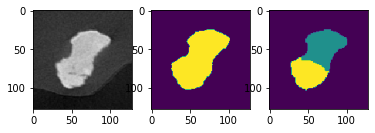

tensor(0.5696, grad_fn=<RsubBackward1>)
[0.6422760486602783, 0.5934911966323853, 0.44615107774734497]


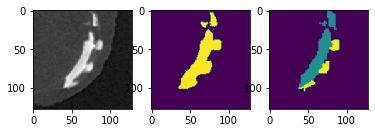

tensor(0.5528, grad_fn=<RsubBackward1>)
[0.6981589198112488, 0.6350460052490234, 0.39304280281066895]


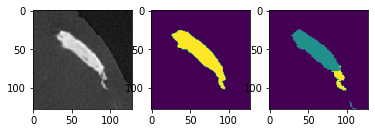

tensor(0.5933, grad_fn=<RsubBackward1>)
[0.6749712824821472, 0.47606444358825684, 0.5181474685668945]


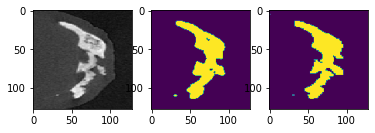

tensor(0.4874, grad_fn=<RsubBackward1>)
[0.8191057443618774, 0.7857117056846619, 0.42495548725128174]


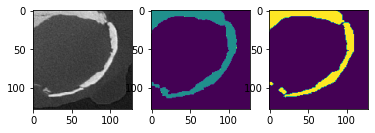

tensor(0.5270, grad_fn=<RsubBackward1>)
[0.742691159248352, 0.7093632221221924, 0.4128645658493042]


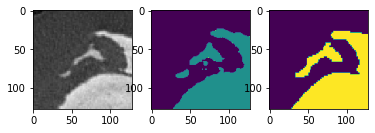

tensor(0.4967, grad_fn=<RsubBackward1>)
[0.7992591857910156, 0.765066921710968, 0.4107694625854492]


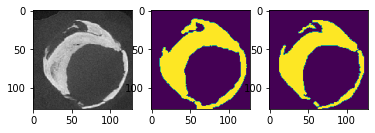

tensor(0.6360, grad_fn=<RsubBackward1>)
[0.5808939933776855, 0.4769706726074219, 0.49039560556411743]


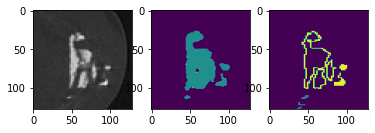

tensor(0.6364, grad_fn=<RsubBackward1>)
[0.5826401710510254, 0.47279059886932373, 0.49124133586883545]


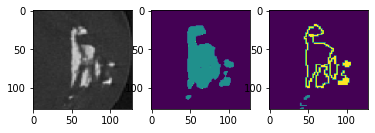

tensor(0.5718, grad_fn=<RsubBackward1>)
[0.66916823387146, 0.6386778354644775, 0.4032677412033081]


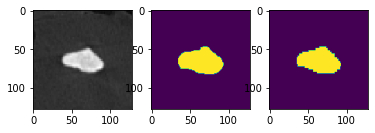

tensor(0.5443, grad_fn=<RsubBackward1>)
[0.7201348543167114, 0.5863178372383118, 0.4343058466911316]


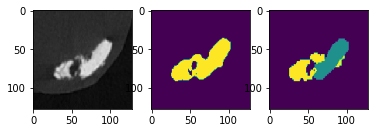

tensor(0.5811, grad_fn=<RsubBackward1>)
[0.7072706818580627, 0.47912490367889404, 0.47468698024749756]


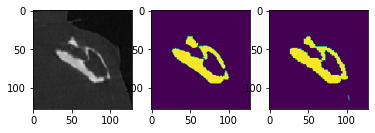

tensor(0.5598, grad_fn=<RsubBackward1>)
[0.76047682762146, 0.46669626235961914, 0.5158818364143372]


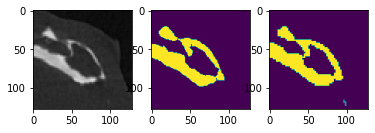

tensor(0.5599, grad_fn=<RsubBackward1>)
[0.7462542653083801, 0.46949994564056396, 0.5377391576766968]


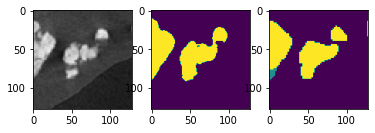

tensor(0.6058, grad_fn=<RsubBackward1>)
[0.6484294533729553, 0.4703863859176636, 0.4333075284957886]


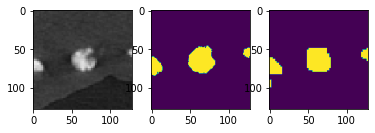

tensor(0.4628, grad_fn=<RsubBackward1>)
[0.8538404703140259, 0.7132088541984558, 0.5047652721405029]


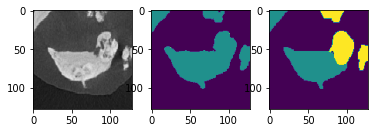

tensor(0.5246, grad_fn=<RsubBackward1>)
[0.7902896404266357, 0.5510525107383728, 0.5158202052116394]


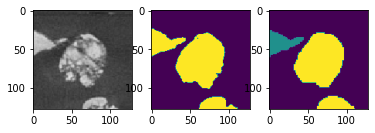

tensor(0.5556, grad_fn=<RsubBackward1>)
[0.7632938623428345, 0.47328710556030273, 0.5549291372299194]


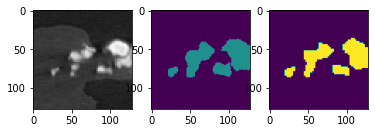

tensor(0.4943, grad_fn=<RsubBackward1>)
[0.8079972267150879, 0.7066754698753357, 0.4515799283981323]


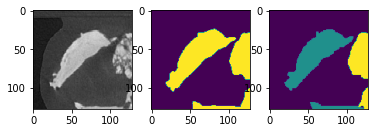

tensor(0.5634, grad_fn=<RsubBackward1>)
[0.7438707947731018, 0.46847909688949585, 0.5127854943275452]


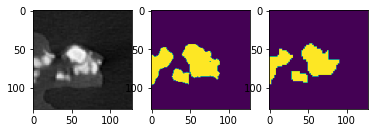

tensor(0.5241, grad_fn=<RsubBackward1>)
[0.7519364356994629, 0.6569564342498779, 0.4495950937271118]


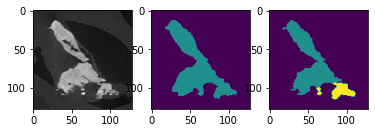

[0.72092609 0.5817311  0.46903784] 0.5524475791237571


In [6]:
#------------------------------------------------------------------
# Proba Unet model5
#------------------------------------------------------------------

loss_fn  =  DiceLoss()  
dice_score_classes, loss = test(net, loss_fn, dataloaders_test, device, ProbaUnet = True, plot_ = True)
print(dice_score_classes, loss)


tensor(0.5989, grad_fn=<RsubBackward1>)
[0.6887736320495605, 0.5870253443717957, 0.4858853816986084]


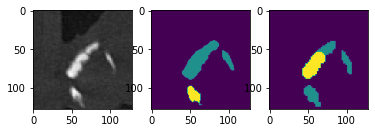

tensor(0.5361, grad_fn=<RsubBackward1>)
[0.7706735134124756, 0.6388874650001526, 0.5356100797653198]


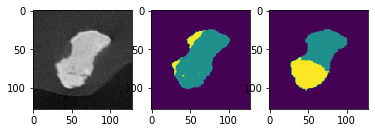

tensor(0.5691, grad_fn=<RsubBackward1>)
[0.6825234293937683, 0.6399411559104919, 0.5042875409126282]


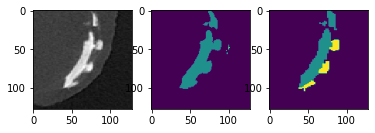

tensor(0.5161, grad_fn=<RsubBackward1>)
[0.7410100698471069, 0.7168383002281189, 0.5075808167457581]


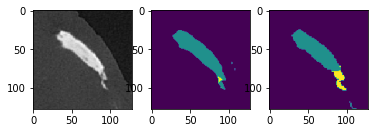

tensor(0.6029, grad_fn=<RsubBackward1>)
[0.7182340025901794, 0.48220980167388916, 0.5804581046104431]


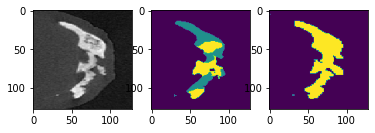

tensor(0.4101, grad_fn=<RsubBackward1>)
[0.8904983401298523, 0.8811304569244385, 0.49827027320861816]


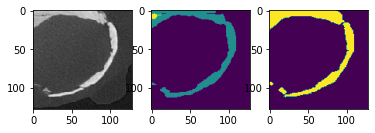

tensor(0.4547, grad_fn=<RsubBackward1>)
[0.8275353908538818, 0.805077850818634, 0.48747003078460693]


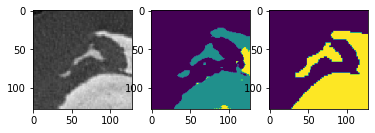

tensor(0.4035, grad_fn=<RsubBackward1>)
[0.89437335729599, 0.8902051448822021, 0.49725037813186646]


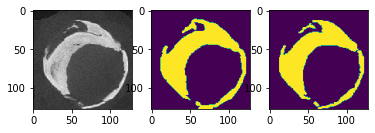

tensor(0.6652, grad_fn=<RsubBackward1>)
[0.5850077867507935, 0.48767757415771484, 0.5020727515220642]


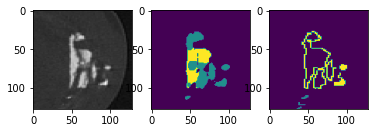

tensor(0.6812, grad_fn=<RsubBackward1>)
[0.5805901885032654, 0.4697379469871521, 0.49287140369415283]


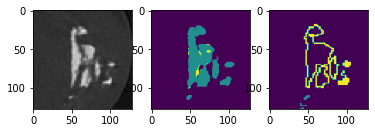

tensor(0.5287, grad_fn=<RsubBackward1>)
[0.7067279815673828, 0.7074572443962097, 0.4998115301132202]


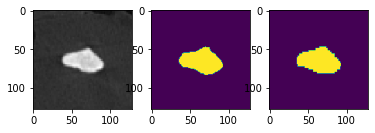

tensor(0.5050, grad_fn=<RsubBackward1>)
[0.771434485912323, 0.6441152095794678, 0.5875105857849121]


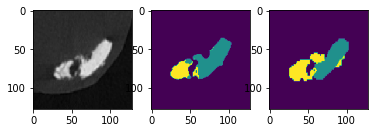

tensor(0.6569, grad_fn=<RsubBackward1>)
[0.7451159358024597, 0.47787684202194214, 0.5014309883117676]


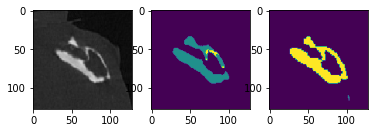

tensor(0.6693, grad_fn=<RsubBackward1>)
[0.8195355534553528, 0.46220797300338745, 0.4650023579597473]


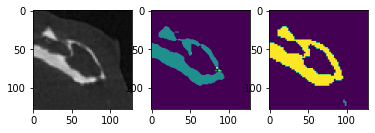

tensor(0.6217, grad_fn=<RsubBackward1>)
[0.8173535466194153, 0.4606431722640991, 0.5439721941947937]


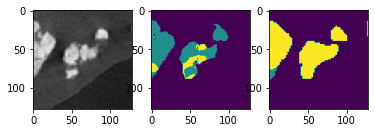

tensor(0.5789, grad_fn=<RsubBackward1>)
[0.6818000674247742, 0.4919027090072632, 0.6328285932540894]


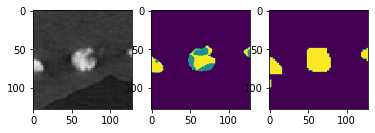

tensor(0.4443, grad_fn=<RsubBackward1>)
[0.9471292495727539, 0.7807181477546692, 0.5044335126876831]


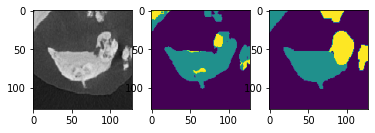

tensor(0.4422, grad_fn=<RsubBackward1>)
[0.8851382732391357, 0.6184097528457642, 0.689992368221283]


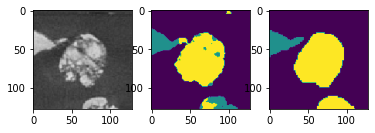

tensor(0.6006, grad_fn=<RsubBackward1>)
[0.8212095499038696, 0.4730919599533081, 0.6105287671089172]


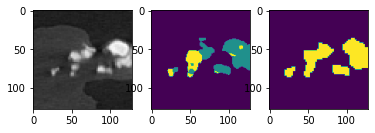

tensor(0.4149, grad_fn=<RsubBackward1>)
[0.8931549191474915, 0.7976863980293274, 0.5574598908424377]


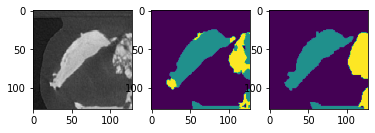

tensor(0.5496, grad_fn=<RsubBackward1>)
[0.811111569404602, 0.4775257110595703, 0.6898605227470398]


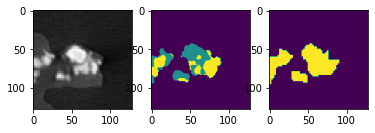

tensor(0.5326, grad_fn=<RsubBackward1>)
[0.8192881345748901, 0.6590277552604675, 0.5181365013122559]


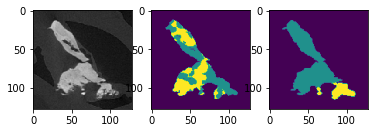

[0.77719177 0.620427   0.54057839] 0.5446620448069139


In [2]:
#------------------------------------------------------------------
#  Unet model 3
#------------------------------------------------------------------
loss_fn  =  DiceLoss()  
dice_score_classes, loss = test(net, loss_fn, dataloaders_test, device, ProbaUnet = False, plot_ = True)
print(dice_score_classes, loss)

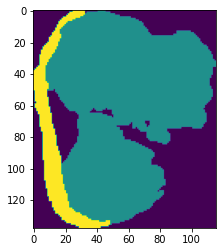

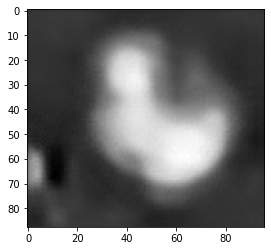

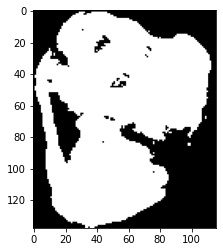

In [88]:
from pickle import FALSE
from outils_prepro import read_image#, create_mask_SR
import os, cv2
import matplotlib.pyplot as plt
import numpy as np
path_sr_images = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\DATA_SFA001\mct_Prox\data_pro'
os.listdir(path_sr_images)
names_images =  [ f for f in os.listdir(path_sr_images) if f.endswith('CTsr2.png') ]
names_masks =  [ f for f in os.listdir(path_sr_images) if f.endswith('seg.png') ]
mCT_list = [ cv2.normalize(cv2.imread(os.path.join(path_sr_images, f)).astype(np.uint8),  None, 0, 255, cv2.NORM_MINMAX)  for f in os.listdir(path_sr_images) if f.endswith('mCT.png') ]
image_list = [ read_image(os.path.join(path_sr_images, f), mask=False) for f in os.listdir(path_sr_images) if f.endswith('CTsr2.png') ]
mask_list= [ create_mask_SR(cv2.imread(os.path.join(path_sr_images, f))) for f in os.listdir(path_sr_images) if f.endswith('seg.png') ]

plt.imshow(mask_list[4])
plt.show()
plt.imshow(image_list[4])
plt.show()
plt.imshow(mCT_list[4])

In [89]:

#------------------------------------------------------------------
# TEST SUPER RESOLUTION IMAGES
#------------------------------------------------------------------
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#---------------------
from test import test 
from unet_4block_conv import *
from unet_3block_conv import *
from outils_prepro import * 
from data_loader_seg import *
from model_prob_unet_init import *
from create_images_3_classes import *
from training import *
from loss import *
#---------------------
# Data
batch_size_test  = 1
image_shape = (64, 64) 
#---------------------- 
data_test = SegmentationDataset(image_list, mask_list, image_shape)
dataloaders_test = torch.utils.data.DataLoader(data_test, batch_size_test)
#----------------------
# Model 
input_channels = 3
num_classes = 3
# learning_rate = 5e-4  
# epochs = 101
loss_fn  =  DiceLoss() 
folder_name = 'model_unet_1'
#----------------------
# TEST
epoch_init = '100.torch'
#----------------------
beta = 20
filters = 8
z_dim = 10
#----------------------
if filters == 8:
    featureDim = 16384
if filters ==4:
    featureDim = 8192


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelPath = os.path.join(r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg', folder_name)
#net = Probabilistic_UNET(input_channels, num_classes, filters, z_dim, image_shape, featureDim)
net = UNET(input_channels, num_classes) 
net.to(device)
net.load_state_dict(torch.load(os.path.join(modelPath , epoch_init))) # Load trained model
net.eval()
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=0)

UNET(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kerne

SFA001_A.2.1.1_CTsr2.png


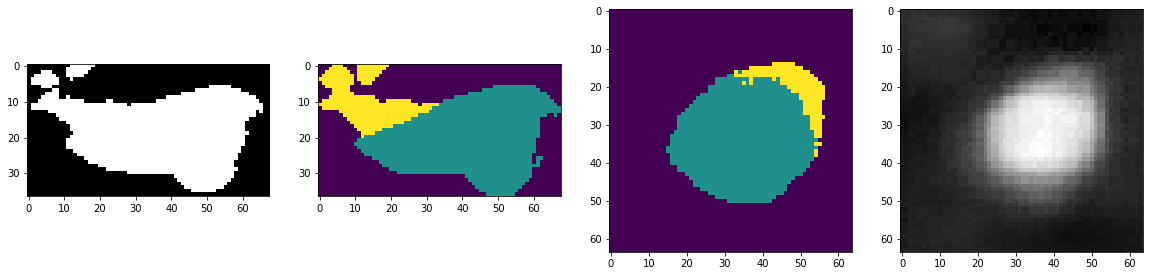

SFA001_A.2.1.2_CTsr2.png


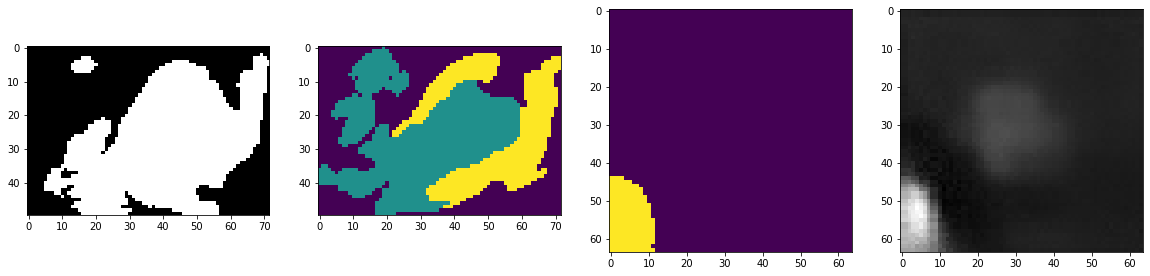

SFA001_A.2.1.3_CTsr2.png


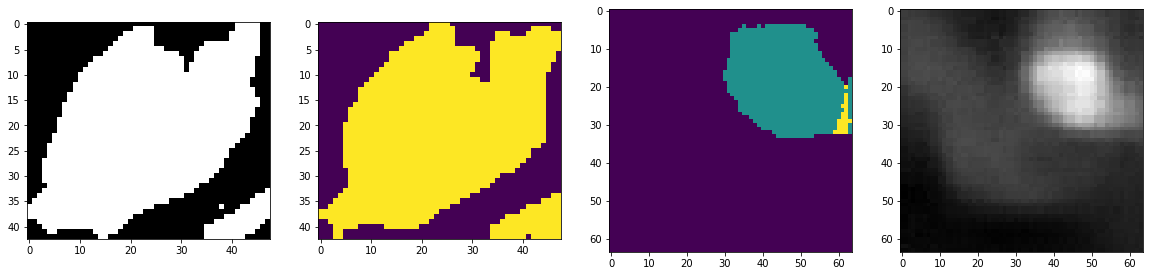

SFA001_A.3.1.1_CTsr2.png


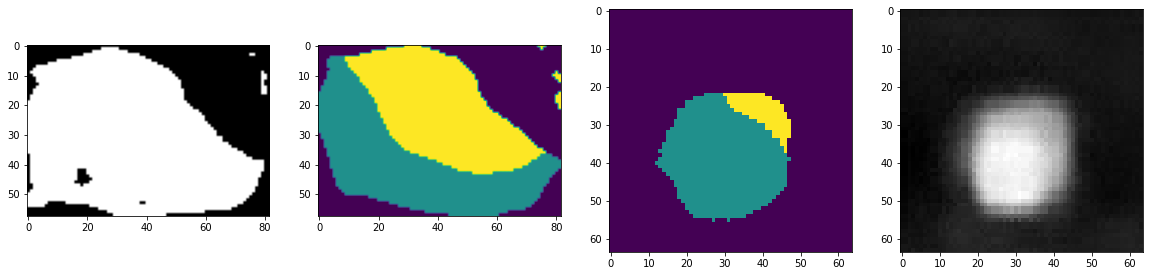

SFA001_A.3.1.3_CTsr2.png


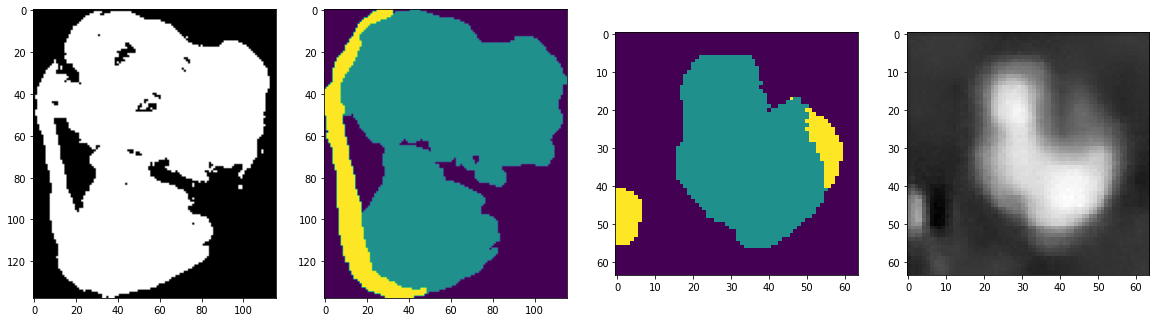

SFA001_A.3.1.5_CTsr2.png


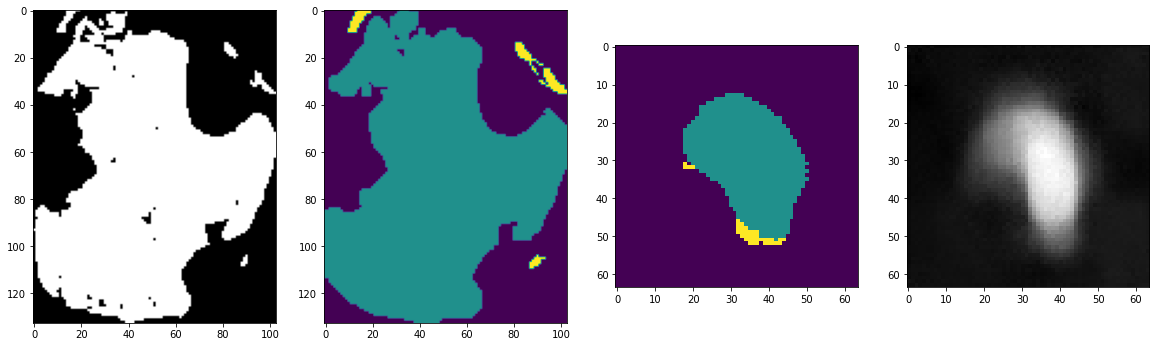

SFA001_A.4.1.1_CTsr2.png


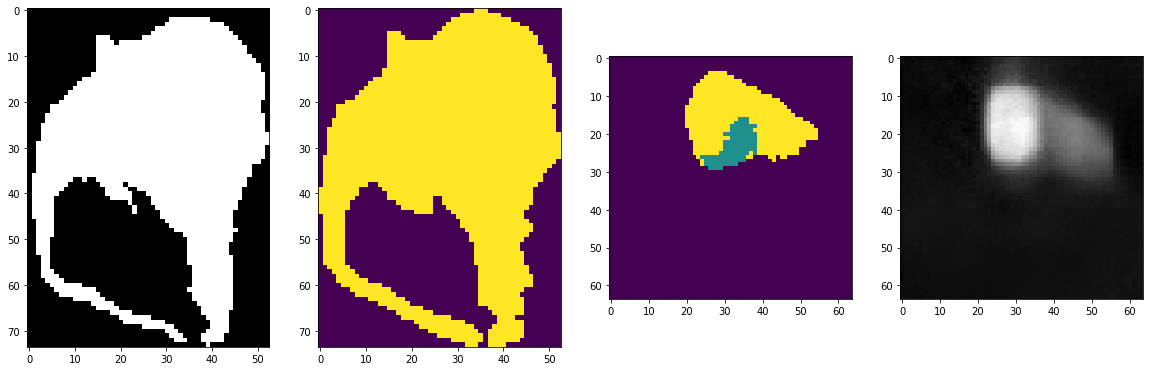

SFA001_A.4.1.4_CTsr2.png


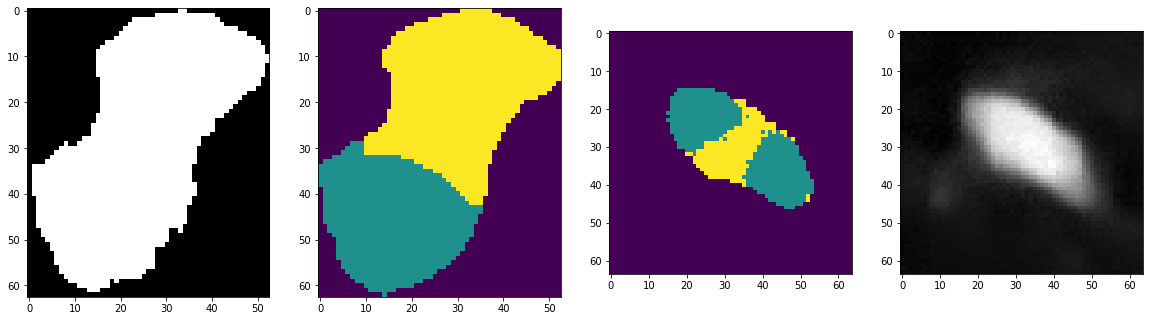

SFA001_A.4.1.5_CTsr2.png


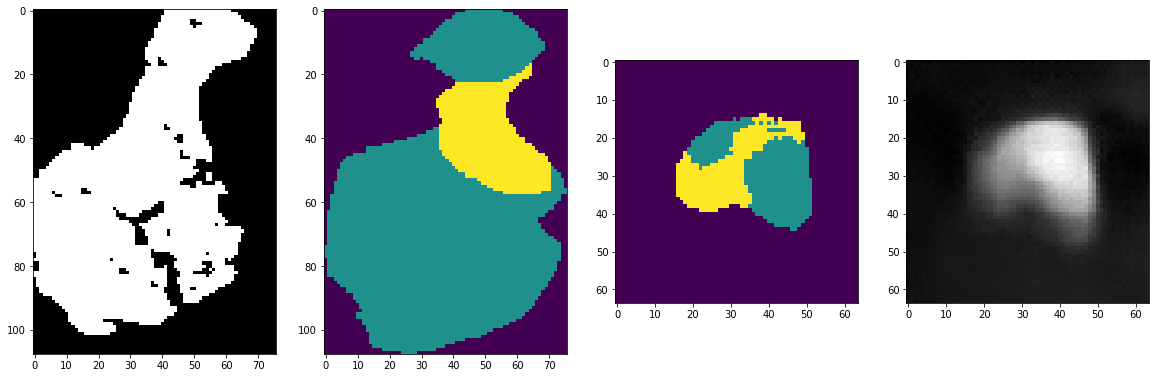

SFA001_A.4.1.6_CTsr2.png


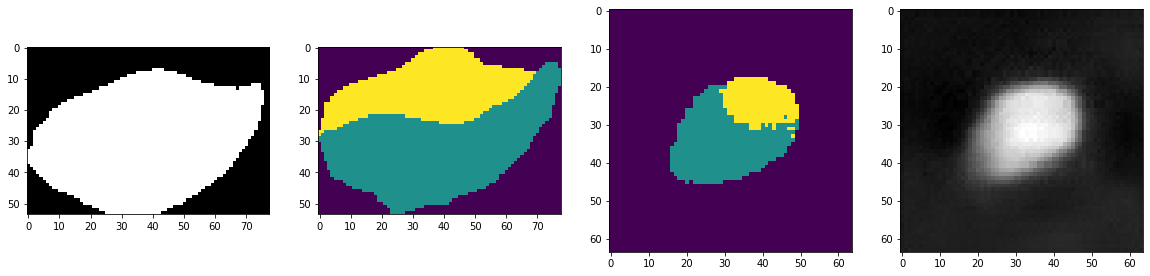

SFA001_A.5.1.1_CTsr2.png


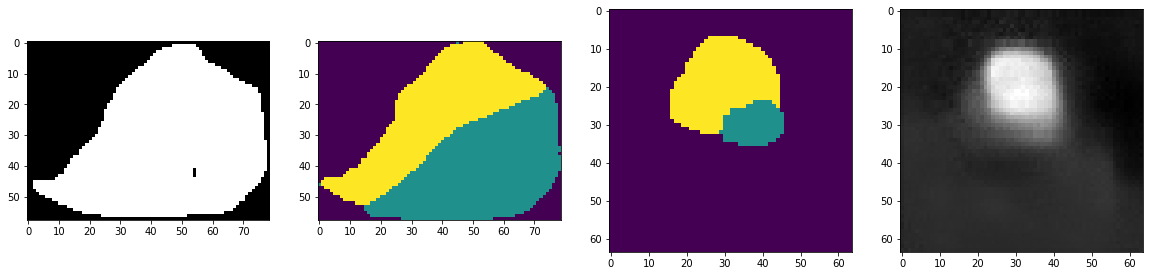

In [106]:
from matplotlib.pyplot import figure


def test_SR(net, loss_fn, dataloaders_test, device, mCT, seg_mCT,names,ProbaUnet = True, plot_ = True):
    for index, batch in enumerate(dataloaders_test): 
        X, y = batch

        X, y = X.to(device), y.to(device)
        
        if ProbaUnet:
            _,_, pred =  net(X, y)
        else:
            pred =  net(X)

        seg = torch.argmax(pred, dim=1).numpy()[0]# torch.argmax(pred, 1).numpy()  # Get  prediction classes
        for i in range(pred.shape[1]):
            y1 = 1*(y==i)
            pred1 = pred[:,i,:,:].unsqueeze(0)
        if plot_:
            print(names[index])
            _, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 10))
            ax1.imshow(mCT[index])
            ax2.imshow(seg_mCT[index])
            ax3.imshow(seg)
            ax4.imshow(X.squeeze().permute(1,2,0))
            
            plt.show()

test_SR(net, loss_fn, dataloaders_test, device,mCT_list, mask_list, names, ProbaUnet = False, plot_ = True)

NameError: name 'y' is not defined

In [1]:

#------------------------------------------------------------------
# TEST SUPER RESOLUTION IMAGES
#------------------------------------------------------------------
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#---------------------
from test import test 
from unet_4block_conv import *
from unet_3block_conv import *
from outils_prepro import * 
from data_loader_seg import *
from model_prob_unet_init import *
from create_images_3_classes import *
from training import *
from loss import *
#---------------------
# Data
batch_size_test  = 1
image_shape = (64, 64) 
#---------------------- 
data_test = SegmentationDataset(image_list, mask_list, image_shape)
dataloaders_test = torch.utils.data.DataLoader(data_test, batch_size_test)
#----------------------
# Model 
input_channels = 3
num_classes = 3
# learning_rate = 5e-4  
# epochs = 101
loss_fn  =  DiceLoss() 
folder_name = 'model_unet_1'
#----------------------
# TEST
epoch_init = '100.torch'
#----------------------
beta = 20
filters = 8
z_dim = 10
#----------------------
if filters == 8:
    featureDim = 16384
if filters ==4:
    featureDim = 8192


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelPath = os.path.join(r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg', folder_name)
#net = Probabilistic_UNET(input_channels, num_classes, filters, z_dim, image_shape, featureDim)
net = UNET(input_channels, num_classes) 
net.to(device)
net.load_state_dict(torch.load(os.path.join(modelPath , epoch_init))) # Load trained model
net.eval()


NameError: name 'image_list' is not defined

In [3]:
#----------------------
# Model 
input_channels = 3
num_classes = 3
# learning_rate = 5e-4  
# epochs = 101
loss_fn  =  DiceLoss() 
folder_name = 'model_unet_1'
#----------------------
# TEST
epoch_init = '100.torch'
#----------------------
beta = 20
filters = 8
z_dim = 10
#----------------------
if filters == 8:
    featureDim = 16384
if filters ==4:
    featureDim = 8192


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelPath = os.path.join(r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg', folder_name)
#net = Probabilistic_UNET(input_channels, num_classes, filters, z_dim, image_shape, featureDim)
net = UNET(input_channels, num_classes) 
net.to(device)
net.load_state_dict(torch.load(os.path.join(modelPath , epoch_init))) # Load trained model
net.eval()


UNET(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kerne

In [5]:
summary(net, (3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]           4,736
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
            Conv2d-4         [-1, 32, 128, 128]          50,208
       BatchNorm2d-5         [-1, 32, 128, 128]              64
              ReLU-6         [-1, 32, 128, 128]               0
         MaxPool2d-7           [-1, 32, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          18,496
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
           Conv2d-11           [-1, 64, 64, 64]          36,928
      BatchNorm2d-12           [-1, 64, 64, 64]             128
             ReLU-13           [-1, 64, 64, 64]               0
        MaxPool2d-14           [-1, 64,

In [8]:
repr(net)

'UNET(\n  (conv1): Sequential(\n    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))\n    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): ReLU()\n    (3): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))\n    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (5): ReLU()\n    (6): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)\n  )\n  (conv2): Sequential(\n    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): ReLU()\n    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (5): ReLU()\n    (6): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)\n  )\n  (conv3): Sequential(\n    (0): 